In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df=pd.read_csv("/content/drive/MyDrive/project(11 2024)/VIC.csv")

In [ ]:
df

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,VIC,10/17/2018 9:39,98.5,98.5,98.5,98.5,390,0
1,VIC,10/17/2018 9:40,98.5,98.5,98.5,98.5,760,0
2,VIC,10/17/2018 9:41,98.6,98.6,98.6,98.6,2060,0
3,VIC,10/17/2018 9:42,98.6,98.6,98.6,98.6,5540,0
4,VIC,10/17/2018 9:43,98.6,98.7,98.6,98.7,760,0
...,...,...,...,...,...,...,...,...
101261,VIC,12/22/2020 14:22,105.8,105.8,105.7,105.7,1870,0
101262,VIC,12/22/2020 14:23,105.7,105.7,105.7,105.7,2510,0
101263,VIC,12/22/2020 14:24,105.7,105.7,105.7,105.7,3620,0
101264,VIC,12/22/2020 14:25,105.7,105.7,105.7,105.7,100,0


In [ ]:
df=df.drop(columns=["Ticker","Open","High","Low","Volume","Open Interest"])
df.head()

,Date/Time,Close
0,10/17/2018 9:39,98.5
1,10/17/2018 9:40,98.5
2,10/17/2018 9:41,98.6
3,10/17/2018 9:42,98.6
4,10/17/2018 9:43,98.7


In [ ]:
df["Date/Time"]=pd.to_datetime(df["Date/Time"])

In [ ]:
len(df)*0.8

81012.8

In [ ]:
df_train=df.iloc[:81012]
df_train

,Date/Time,Close
0,2018-10-17 09:39:00,98.5
1,2018-10-17 09:40:00,98.5
2,2018-10-17 09:41:00,98.6
3,2018-10-17 09:42:00,98.6
4,2018-10-17 09:43:00,98.7
...,...,...
81007,2020-07-31 10:02:00,86.7
81008,2020-07-31 10:03:00,86.7
81009,2020-07-31 10:04:00,87.0
81010,2020-07-31 10:05:00,87.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split

prediction_minutes=60
df_date=df_train["Date/Time"]
scaler=MinMaxScaler()
df_date=scaler.fit_transform(df_train["Close"].values.reshape(-1,1))
prediction_minutes=60
X=[]
y=[]
for i in range(prediction_minutes,len(df_date)):
  X.append(df_date[i-prediction_minutes:i,0])
  y.append(df_date[i,0])

X,y=np.array(X),np.array(y)
X=np.reshape(X,(X.shape[0],X.shape[1],1))

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
import tensorflow as tf

In [ ]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units=50,return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units=50,return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units=50))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer="adam",loss="mean_squared_error")
model.fit(X_train,y_train,epochs=30,verbose=1,batch_size=128)

Epoch 1/30
506/506 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - loss: 0.0208
Epoch 2/30
506/506 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0027
Epoch 3/30
506/506 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 0.0022
Epoch 4/30
506/506 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - loss: 0.0018
Epoch 5/30
506/506 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 0.0014
Epoch 6/30
506/506 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.0011
Epoch 7/30
506/506 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 8.4062e-04
Epoch 8/30
506/506 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 6.6669e-04
Epoch 9/30
506/506 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 5.2245e-04
Epoch 10/30
506/506 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 4.4519e-04
Epoch 11/30
506/506 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 3.8424e-04
Epoch 12/30
506/506 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 3.4660e-04
Epoch 13/30
506/506 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 3.4141e-04
Epoch 14/30
506/506 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 3.3910e-04
Epoch 

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
pred=model.predict(X_test)
pred_rescaled=scaler.inverse_transform(pred)
y_test_rescaled=scaler.inverse_transform(y_test.reshape(-1,1))
mae = mean_absolute_error(y_test_rescaled, pred_rescaled)
mse = mean_squared_error(y_test_rescaled, pred_rescaled)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_rescaled,pred_rescaled)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

506/506 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
MAE: 0.20255555124679248
MSE: 0.11126109364164236
RMSE: 0.3335582312605137
R²: 0.9991766414665594


In [ ]:
model.save(f"/content/drive/MyDrive/final_PyFDS/saved_VIC_model.keras")

### Test performance

In [ ]:
df_test=df.iloc[81012:]
df_test

,Date/Time,Close
81012,2020-07-31 10:08:00,86.8
81013,2020-07-31 10:09:00,86.8
81014,2020-07-31 10:10:00,86.8
81015,2020-07-31 10:11:00,86.8
81016,2020-07-31 10:12:00,86.7
...,...,...
101261,2020-12-22 14:22:00,105.7
101262,2020-12-22 14:23:00,105.7
101263,2020-12-22 14:24:00,105.7
101264,2020-12-22 14:25:00,105.7


In [ ]:
model=tf.keras.models.load_model("/content/drive/MyDrive/final_PyFDS/saved_VIC_model.keras")

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
prediction_minutes=60
df_date=df_test["Date/Time"]
scaler=MinMaxScaler()
df_date=scaler.fit_transform(df_test["Close"].values.reshape(-1,1))
prediction_minutes=60
X=[]
for i in range(prediction_minutes,len(df_date)):
  X.append(df_date[i-prediction_minutes:i,0])


X=np.array(X)
X=np.reshape(X,(X.shape[0],X.shape[1],1))

In [ ]:
X.shape

(20194, 60, 1)

In [ ]:
pred_test=model.predict(X)

632/632 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step


In [ ]:
pred_test_rescaled=scaler.inverse_transform(pred_test)

In [ ]:
pred_test_rescaled

array([[ 87.40088 ],
       [ 87.37808 ],
       [ 87.354965],
       ...,
       [105.887985],
       [105.87289 ],
       [105.85814 ]], dtype=float32)

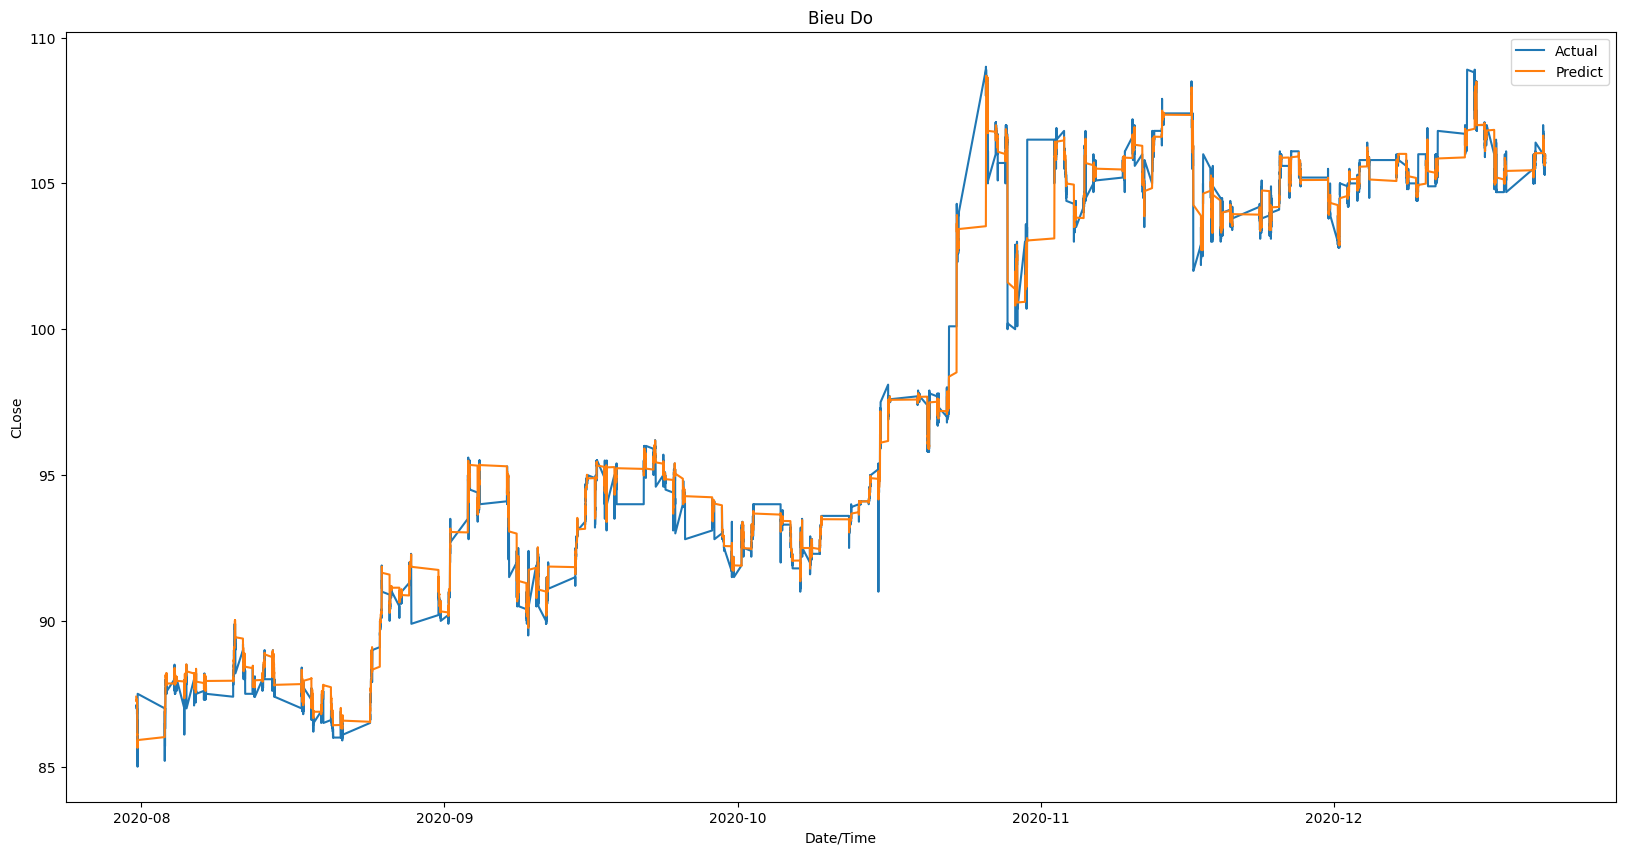

In [ ]:
import matplotlib.pyplot as plt
df_original=df_test.iloc[60:]
time=df_original["Date/Time"]
plt.figure(figsize=(20,10))
plt.title("Bieu Do")
plt.xlabel("Date/Time")
plt.ylabel("CLose")
plt.plot(time,df_original["Close"],label="original")
plt.plot(time,pred_test_rescaled,label="Predict")
plt.legend(["Actual","Predict"])
plt.show()